# Parametric Statistical Significance Tests

source: https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/ <br>

The p-value can be interpreted in the context of a chosen significance level called alpha. A common value for alpha is 5%, or 0.05. If the p-value is below the significance level, then the test says there is enough evidence to reject the null hypothesis and that the samples were likely drawn from populations with differing distributions.

* p <= alpha: reject null hypothesis, different distribution.
* p > alpha: fail to reject null hypothesis, same distribution.

## Test Data

In [1]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

seed(69)

data1 = 5*randn(100) + 50
data2 = 5*randn(100) + 51

print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

data1: mean=49.808 stdv=5.562
data2: mean=50.862 stdv=5.316


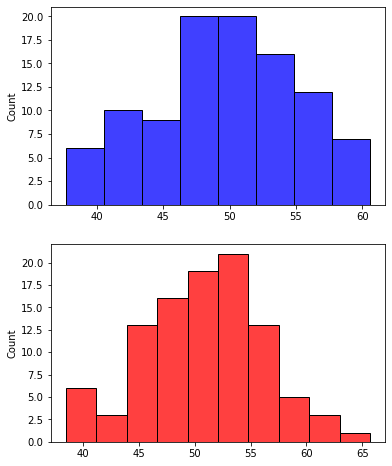

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, axs = plt.subplots(2,1,figsize=(6,8))
sns.histplot(ax=axs[0],x=data1, color='b')
sns.histplot(ax=axs[1],x=data2, color='r')

plt.show()

## Student's t-Test

The Student’s t-test is a statistical hypothesis test that two independent data samples known to have a Gaussian distribution, have the same Gaussian distribution, named for William Gosset, who used the pseudonym “Student“.
<br>

The assumption or null hypothesis of the test is that the means of two populations are equal. A rejection of this hypothesis indicates that there is sufficient evidence that the means of the populations are different, and in turn that the distributions are not equal.

* Fail to Reject H0: Sample distributions are equal.
* Reject H0: Sample distributions are not equal.

In [20]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=-1.363, p=0.174


In [21]:
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Same distribution (fail to reject H0)


## Paired Student's t-Test

We may wish to compare the means between two data samples that are related in some way.<br>

For example, the data samples may represent two independent measures or evaluations of the same object. These data samples are repeated or dependent and are referred to as paired samples or repeated measures. <br>

Because the samples are not independent, we cannot use the Student’s t-test. Instead, we must use a modified version of the test that corrects for the fact that the data samples are dependent, called the paired Student’s t-test.<br>

The test is simplified because it no longer assumes that there is variation between the observations, that observations were made in pairs, before and after a treatment on the same subject or subjects.

The default assumption, or null hypothesis of the test, is that there is no difference in the means between the samples. The rejection of the null hypothesis indicates that there is enough evidence that the sample means are different.

* Fail to Reject H0: Paired sample distributions are equal.
* Reject H0: Paired sample distributions are not equal.

In [23]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=-1.318, p=0.190


In [24]:
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Same distribution (fail to reject H0)
